## DATA ANALYSIS PROJECT- Top 100 universities in the world

In this project we will focus on the top 100 universities in the world between the years 2010 to 2022.
We will try and see if we can predict the top 100 universities and to characterize them.

As students, we are curios about who are the top 100 universities because before we started our journey in education at a higher education institution, we debated which institution to choose, like many people around the world who have the same feeling. This led us to research about the top universities around the world.


#### CRAWLING 
The data is from the site called "Round World Universities". In this website, each year, from 2010 to 2022, has its own page and a table of the ranking of all the universities around the world, from the table you can get to each university page and get all it’s ranking parameters and characteristics in that same year. The site has 20 parameters to calculate the universities ranks and grouped them into 4 main parameters: Teaching, Research, International Diversity and Financial Sustainability.

When we tried to crawl the data with Beautiful Soup, for a reason we could not understand, it showed us as if the tables of each year are empty. To solve the problem we had to use Selenium.

We imported the relevant libraries.

In [258]:
from bs4 import BeautifulSoup  
import scipy as sc
import numpy as np
import pandas as pd
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
import unittest, time, re
import os
import sys


In [259]:
driver = webdriver.Chrome()


In [260]:
k=0
year_indx=2010

First, we created lists for all the features we wanted our dataframe to have.

In [261]:
ranks=list()
year=list()
total_score=list()
country=list()
university_name=list()
foundation_year=list()
short_name=list()
university_type=list()
number_of_students=list()
number_of_faculty=list()
students_faculty_ratio=list()
website_link=list()
region=list()
location=list()
reputation_rank=list()
reputation_score=list()
academic_rank=list()
academic_score=list()
teaching_world_rank=list()
teaching_country_rank=list()
teaching_world_score=list()
teaching_academic_staff_per_students_rank=list()
teaching_academic_staff_per_students_score=list()
teaching_academic_staff_per_bachelor_degrees_awarded_rank=list()
teaching_academic_staff_per_bachelor_degrees_awarded_score=list()
teaching_doctoral_degrees_awarded_per_academic_staff_rank=list()
teaching_doctoral_degrees_awarded_per_academic_staff_score=list()
teaching_doctoral_degrees_awarded_per_bachelor_degrees_awarded_rank=list()
teaching_doctoral_degrees_awarded_per_bachelor_degrees_awarded_score=list()
teaching_world_teaching_reputation_rank=list()
teaching_world_teaching_reputation_score=list()
research_world_rank=list()
research_country_rank=list()
research_world_score=list()
research_citations_per_academic_and_research_staff_rank=list()
research_citations_per_academic_and_research_staff_score=list()
research_doctoral_degrees_awarded_per_admitted_PhD_rank=list()
research_doctoral_degrees_awarded_per_admitted_PhD_score=list()
research_normalized_citation_impact_rank=list()
research_normalized_citation_impact_score=list()
research_papers_per_academic_and_research_staff_rank=list()
research_papers_per_academic_and_research_staff_score=list()
research_world_research_reputation_rank=list()
research__world_research_reputation_score=list()
international_diversity_world_rank=list()
international_diversity_country_rank=list()
international_diversity_world_score=list()
international_diversity_share_of_international_academic_staff_rank=list()
international_diversity_share_of_international_academic_staff_score=list()
international_diversity_share_of_international_students_rank=list()
international_diversity_share_of_international_students_score=list()
international_diversity_share_of_international_co_authored_papers_rank=list()
international_diversity_share_of_international_co_authored_papers_score=list()
international_diversity_reputation_outside_region_rank=list()
international_diversity_reputation_outside_region_score=list()
international_diversity_International_level_rank=list()
international_diversity_International_level_score=list()
financial_sustainability_world_rank=list()
financial_sustainability_country_rank=list()
financial_sustainability_world_score=list()
financial_sustainability_institutional_income_per_academic_staff_rank=list()
financial_sustainability_institutional_income_per_academic_staff_score=list()
financial_sustainability_institutional_income_per_students_rank=list()
financial_sustainability_institutional_income_per_students_score=list()
financial_sustainability_papers_per_research_income_rank=list()
financial_sustainability_papers_per_research_income_score=list()
financial_sustainability_research_income_per_academic_and_research_staff_rank=list()
financial_sustainability_research_income_per_academic_and_research_staff_score=list()
financial_sustainability_research_income_per_institutional_income_rank=list()
financial_sustainability_research_income_per_institutional_income_score=list()

In [262]:
def load_uni_page_features(uni_name):
        time.sleep(5)
        driver.get(uni_name)
        time.sleep(3)
        
        foundation_year.append(driver.find_element("xpath","//dt[(@data-text='Foundation')]").text)
        short_name.append(driver.find_element("xpath","//dt[(@data-text='Short name')]").text)
        university_type.append(driver.find_element("xpath","//dt[(@data-text='Type')]").text)
        number_of_students.append(driver.find_element("xpath","//dt[(@data-text='Students')]").text)
        number_of_faculty.append(driver.find_element("xpath","//dt[(@data-text='Faculty')]").text)
        students_faculty_ratio.append(driver.find_element("xpath","//dt[(@data-text='FS')]").text+":"+driver.find_element("xpath","//dt[(@data-text='Sc')]").text)
        website_link.append(driver.find_element(By.XPATH,"//dl[@class='uni-info-list']/a[@href]").text)
        region.append(driver.find_element("xpath","//dt[(@data-text='Region')]").text)
        location.append(driver.find_element("xpath","//dt[(@data-text='Location')]").text)
        reputation_rank.append(driver.find_element("xpath","//td[(@id='reprnk')]").text)
        reputation_score.append(driver.find_element("xpath","//td[(@id='repscr')]").text)
        academic_rank.append(driver.find_element("xpath","//td[(@id='resrnk')]").text)
        academic_score.append(driver.find_element("xpath","//td[(@id='resscr')]").text)
        
        
        span=driver.find_elements("xpath","//span[(@class='az-indicator')]")
        
        teaching_world_rank.append(driver.find_element("xpath","//td[(@data-text='O_TR')]").text)
        teaching_country_rank.append(driver.find_element("xpath","//td[(@data-text='T_CR')]").text)
        teaching_world_score.append(driver.find_element("xpath","//td[(@data-text='O_TS')]").text)
        teaching_academic_staff_per_students_rank.append(span[0].text)
        teaching_academic_staff_per_students_score.append(span[1].text)
        teaching_academic_staff_per_bachelor_degrees_awarded_rank.append(span[2].text)
        teaching_academic_staff_per_bachelor_degrees_awarded_score.append(span[3].text)
        teaching_doctoral_degrees_awarded_per_academic_staff_rank.append(span[4].text)
        teaching_doctoral_degrees_awarded_per_academic_staff_score.append(span[5].text)
        teaching_doctoral_degrees_awarded_per_bachelor_degrees_awarded_rank.append(span[6].text)
        teaching_doctoral_degrees_awarded_per_bachelor_degrees_awarded_score.append(span[7].text)
        teaching_world_teaching_reputation_rank.append(span[8].text)
        teaching_world_teaching_reputation_score.append(span[9].text)
        
        research_world_rank.append(driver.find_element("xpath","//td[(@data-text='O_RR')]").text)
        research_country_rank.append(driver.find_element("xpath","//td[(@data-text='R_CR')]").text)
        research_world_score.append(driver.find_element("xpath","//td[(@data-text='O_RS')]").text)
        research_citations_per_academic_and_research_staff_rank.append(span[10].text)
        research_citations_per_academic_and_research_staff_score.append(span[11].text)
        research_doctoral_degrees_awarded_per_admitted_PhD_rank.append(span[12].text)
        research_doctoral_degrees_awarded_per_admitted_PhD_score.append(span[13].text)
        research_normalized_citation_impact_rank.append(span[14].text)
        research_normalized_citation_impact_score.append(span[15].text)
        research_papers_per_academic_and_research_staff_rank.append(span[16].text)
        research_papers_per_academic_and_research_staff_score.append(span[17].text)
        research_world_research_reputation_rank.append(span[18].text)
        research__world_research_reputation_score.append(span[19].text)
        
        international_diversity_world_rank.append(driver.find_element("xpath","//td[(@data-text='O_IR')]").text)
        international_diversity_country_rank.append(driver.find_element("xpath","//td[(@data-text='I_CR')]").text)
        international_diversity_world_score.append(driver.find_element("xpath","//td[(@data-text='O_IS')]").text)
        international_diversity_share_of_international_academic_staff_rank.append(span[20].text)
        international_diversity_share_of_international_academic_staff_score.append(span[21].text)
        international_diversity_share_of_international_students_rank.append(span[22].text)
        international_diversity_share_of_international_students_score.append(span[23].text)
        international_diversity_share_of_international_co_authored_papers_rank.append(span[24].text)
        international_diversity_share_of_international_co_authored_papers_score.append(span[25].text)
        international_diversity_reputation_outside_region_rank.append(span[26].text)
        international_diversity_reputation_outside_region_score.append(span[27].text)
        international_diversity_International_level_rank.append(span[28].text)
        international_diversity_International_level_score.append(span[29].text)
        
        financial_sustainability_world_rank.append(driver.find_element("xpath","//td[(@data-text='O_FR')]").text)
        financial_sustainability_country_rank.append(driver.find_element("xpath","//td[(@data-text='F_CR')]").text)
        financial_sustainability_world_score.append(driver.find_element("xpath","//td[(@data-text='O_FS')]").text)
        financial_sustainability_institutional_income_per_academic_staff_rank.append(span[30].text)
        financial_sustainability_institutional_income_per_academic_staff_score.append(span[31].text)
        financial_sustainability_institutional_income_per_students_rank.append(span[32].text)
        financial_sustainability_institutional_income_per_students_score.append(span[33].text)
        financial_sustainability_papers_per_research_income_rank.append(span[34].text)
        financial_sustainability_papers_per_research_income_score.append(span[35].text)
        financial_sustainability_research_income_per_academic_and_research_staff_rank.append(span[36].text)
        financial_sustainability_research_income_per_academic_and_research_staff_score.append(span[37].text)
        financial_sustainability_research_income_per_institutional_income_rank.append(span[38].text)
        financial_sustainability_research_income_per_institutional_income_score.append(span[39].text)


        time.sleep(5)

We will explaine the function above, load_uni_page_features, in a bit. The code cell below will get the features: rank, year, university name, country of each university in the top 100. Get a list of all these universities URLs and sent each URL to load_uni_page_features function.
load_uni_page_features will get features of each university like foundation year, number of students and the parameters we talked about before like, teaching and research of the same year the link has been send from.

In [263]:
for each_year in range(year_indx,2023):
    driver.get("https://roundranking.com/ranking/world-university-rankings.html#world-"+str(each_year))
    time.sleep(10)
    uni_links=list()
    university_name_page=list()
    ranks_page=list()
    total_score_page=list()
    country_page=list()
    university_name_page=driver.find_elements(By.XPATH,"//tr[@class='az-row-100']/td[2]/a[@href]")
    ranks_page=driver.find_elements(By.XPATH,"//tr[@class='az-row-100']/td[1]")
    total_score_page=driver.find_elements(By.XPATH,"//tr[@class='az-row-100']/td[3]")
    country_page=driver.find_elements(By.XPATH,"//tr[@class='az-row-100']/td[4]")
    for j in range(len(university_name_page)):
        uni_links.append(str(university_name_page[j].get_attribute("href")))
    university_name_page=([str(university_name_page[i].text) for i in range(len(university_name_page))])
    ranks_page=([int(ranks_page[i].text) for i in range(len(ranks_page))])
    total_score_page=([float(total_score_page[i].text) for i in range(len(total_score_page))])
    country_page=([str(country_page[i].text) for i in range(len(country_page))])
    
    for i in range(k,len(uni_links)):
        year.append(each_year)
        load_uni_page_features(uni_links[i])
        print(k)
        k+=1
    k=0
    print("ranks_page len: "+str(len(ranks_page)))
    
    ranks+=ranks_page
    university_name+=university_name_page
    total_score+=total_score_page
    country+=country_page
    print("done: "+str(year_indx))
    print("ranks len: "+str(len(ranks))+" university_name: "+str(len(university_name))+" "+university_name[99])
    year_indx+=1
    time.sleep(10)

In [264]:
df=pd.DataFrame({"ranks":ranks,"university_name":university_name,"year":year,"total_score":total_score,"country":country,"foundation_year":foundation_year,"short_name":short_name,"university_type":university_type,"number_of_students":number_of_students,"number_of_faculty":number_of_faculty,"students_faculty_ratio":students_faculty_ratio,"website_link":website_link,"region":region,"location":location,"reputation_rank":reputation_rank,"reputation_score":reputation_score,"academic_rank":academic_rank,"academic_score":academic_score,"teaching_world_rank":teaching_world_rank,"teaching_country_rank":teaching_country_rank,"teaching_world_score":teaching_world_score,"teaching_academic_staff_per_students_rank":teaching_academic_staff_per_students_rank,"teaching_academic_staff_per_students_score":teaching_academic_staff_per_students_score,"teaching_academic_staff_per_bachelor_degrees_awarded_rank":teaching_academic_staff_per_bachelor_degrees_awarded_rank,"teaching_academic_staff_per_bachelor_degrees_awarded_score":teaching_academic_staff_per_bachelor_degrees_awarded_score,"teaching_doctoral_degrees_awarded_per_academic_staff_rank":teaching_doctoral_degrees_awarded_per_academic_staff_rank,"teaching_doctoral_degrees_awarded_per_academic_staff_score":teaching_doctoral_degrees_awarded_per_academic_staff_score,"teaching_doctoral_degrees_awarded_per_bachelor_degrees_awarded_rank":teaching_doctoral_degrees_awarded_per_bachelor_degrees_awarded_rank,"teaching_doctoral_degrees_awarded_per_bachelor_degrees_awarded_score":teaching_doctoral_degrees_awarded_per_bachelor_degrees_awarded_score,"teaching_world_teaching_reputation_rank":teaching_world_teaching_reputation_rank,"teaching_world_teaching_reputation_score":teaching_world_teaching_reputation_score,"research_world_rank":research_world_rank,"research_country_rank":research_country_rank,"research_world_score":research_world_score,"research_citations_per_academic_and_research_staff_rank":research_citations_per_academic_and_research_staff_rank,"research_citations_per_academic_and_research_staff_score":research_citations_per_academic_and_research_staff_score,"research_doctoral_degrees_awarded_per_admitted_PhD_rank":research_doctoral_degrees_awarded_per_admitted_PhD_rank,"research_doctoral_degrees_awarded_per_admitted_PhD_score":research_doctoral_degrees_awarded_per_admitted_PhD_score,"research_normalized_citation_impact_rank":research_normalized_citation_impact_rank,"research_normalized_citation_impact_score":research_normalized_citation_impact_score,"research_papers_per_academic_and_research_staff_rank":research_papers_per_academic_and_research_staff_rank,"research_papers_per_academic_and_research_staff_score":research_papers_per_academic_and_research_staff_score,"research_world_research_reputation_rank":research_world_research_reputation_rank,"research__world_research_reputation_score":research__world_research_reputation_score,"international_diversity_world_rank":international_diversity_world_rank,"international_diversity_country_rank":international_diversity_country_rank,"international_diversity_world_score":international_diversity_world_score,"international_diversity_share_of_international_academic_staff_rank":international_diversity_share_of_international_academic_staff_rank,"international_diversity_share_of_international_academic_staff_score":international_diversity_share_of_international_academic_staff_score,"international_diversity_share_of_international_students_rank":international_diversity_share_of_international_students_rank,"international_diversity_share_of_international_students_score":international_diversity_share_of_international_students_score,"international_diversity_share_of_international_co_authored_papers_rank":international_diversity_share_of_international_co_authored_papers_rank,"international_diversity_share_of_international_co_authored_papers_score":international_diversity_share_of_international_co_authored_papers_score,"international_diversity_reputation_outside_region_rank":international_diversity_reputation_outside_region_rank,"international_diversity_reputation_outside_region_score":international_diversity_reputation_outside_region_score,"international_diversity_International_level_rank":international_diversity_International_level_rank,"international_diversity_International_level_score":international_diversity_International_level_score,"financial_sustainability_world_rank":financial_sustainability_world_rank,"financial_sustainability_country_rank":financial_sustainability_country_rank,"financial_sustainability_world_score":financial_sustainability_world_score,"financial_sustainability_institutional_income_per_academic_staff_rank":financial_sustainability_institutional_income_per_academic_staff_rank,"financial_sustainability_institutional_income_per_academic_staff_score":financial_sustainability_institutional_income_per_academic_staff_score,"financial_sustainability_institutional_income_per_students_rank":financial_sustainability_institutional_income_per_students_rank,"financial_sustainability_institutional_income_per_students_score":financial_sustainability_institutional_income_per_students_score,"financial_sustainability_papers_per_research_income_rank":financial_sustainability_papers_per_research_income_rank,"financial_sustainability_papers_per_research_income_score":financial_sustainability_papers_per_research_income_score,"financial_sustainability_research_income_per_academic_and_research_staff_rank":financial_sustainability_research_income_per_academic_and_research_staff_rank,"financial_sustainability_research_income_per_academic_and_research_staff_score":financial_sustainability_research_income_per_academic_and_research_staff_score,"financial_sustainability_research_income_per_institutional_income_rank":financial_sustainability_research_income_per_institutional_income_rank,"financial_sustainability_research_income_per_institutional_income_score":financial_sustainability_research_income_per_institutional_income_score})


In [265]:
df_original.to_csv(r'C:\Users\Gal\Desktop\לימודים\שנה 2\סמסטר א\מדעי הנתונים\universities project/universities_project_top_100_2010_to_2022_.csv',index=False)

In [266]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score, mean_squared_error
%matplotlib inline
import warnings
import plotly.express as px

import os
import sys
# pd.set_option('display.max_rows', None)
# pd.set_option("display.max_columns", None)

## Data Cleaning
After we crawled all the data, we saved it in a CSV format

In [267]:
df_original=pd.read_csv('universities_project_top_100_2010_to_2022_ - CCopy.csv')

After we crawled the data, we want to clean it from Nans, duplicated rows and outliers so we can visualize the data properly.

In [268]:
df_clean=df_original.copy()

We will load the data and look at the top of the list.

In [269]:
df_original.head()

,ranks,university_name,year,total_score,country,foundation_year,short_name,university_type,number_of_students,number_of_faculty,...,financial_sustainability_institutional_income_per_academic_staff_rank,financial_sustainability_institutional_income_per_academic_staff_score,financial_sustainability_institutional_income_per_students_rank,financial_sustainability_institutional_income_per_students_score,financial_sustainability_papers_per_research_income_rank,financial_sustainability_papers_per_research_income_score,financial_sustainability_research_income_per_academic_and_research_staff_rank,financial_sustainability_research_income_per_academic_and_research_staff_score,financial_sustainability_research_income_per_institutional_income_rank,financial_sustainability_research_income_per_institutional_income_score
0,1,Harvard University,2010,100.000,USA,1636,Harvard,Private,19330,2020,...,5,99.334,12,98.000,130,77.334,31,94.501,284,50.000
1,2,California Institute of Technology (Caltech),2010,99.077,USA,1891,Caltech,Private,2130,330,...,138,76.000,39,93.334,355,37.600,8,98.600,2,99.835
2,3,Massachusetts Institute of Technology (MIT),2010,97.462,USA,1865,MIT,Public,10080,1190,...,1,100.000,1,100.000,545,4.000,18,96.835,149,73.835
3,4,Stanford University,2010,97.225,USA,1891,Stanford,Private,14810,1870,...,3,99.668,8,98.800,496,12.835,7,98.800,135,76.334
4,5,Columbia University,2010,94.947,USA,1754,Columbia,Private,22020,3960,...,44,92.501,16,97.334,268,53.000,166,70.835,369,35.167


As we described above there are 70 columns and 1298 lines. At this point we use the info() function to get a preliminary understanding on our columns.

In [270]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 70 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   ranks                                                                           1298 non-null   int64  
 1   university_name                                                                 1298 non-null   object 
 2   year                                                                            1298 non-null   int64  
 3   total_score                                                                     1298 non-null   float64
 4   country                                                                         1298 non-null   object 
 5   foundation_year                                                                 1298 non-null   int64  
 6   short_name      

It seems that we don't have nans values but we need to take care the Categorical columns, university name, country university type, students faculty ratio, website link , location reputation rank, reputation score, academic rank, academic score and region and will transfer them to numerical columns. 

In [271]:
df_clean.describe(include='all')

,ranks,university_name,year,total_score,country,foundation_year,short_name,university_type,number_of_students,number_of_faculty,...,financial_sustainability_institutional_income_per_academic_staff_rank,financial_sustainability_institutional_income_per_academic_staff_score,financial_sustainability_institutional_income_per_students_rank,financial_sustainability_institutional_income_per_students_score,financial_sustainability_papers_per_research_income_rank,financial_sustainability_papers_per_research_income_score,financial_sustainability_research_income_per_academic_and_research_staff_rank,financial_sustainability_research_income_per_academic_and_research_staff_score,financial_sustainability_research_income_per_institutional_income_rank,financial_sustainability_research_income_per_institutional_income_score
count,1298.000000,1298,1298.000000,1298.000000,1298,1298.000000,1294,1298,1298.000000,1298.000000,...,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
unique,NaN,170,NaN,NaN,24,NaN,165,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Harvard University,NaN,NaN,USA,NaN,Harvard,Public,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13,NaN,NaN,559,NaN,13,731,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50.469183,NaN,2015.996918,84.968974,NaN,1820.233436,NaN,NaN,22314.023112,2088.278891,...,190.647920,74.960216,117.761171,83.889314,422.537750,42.388354,144.581664,80.416839,226.117874,69.153605
std,28.885509,NaN,3.741862,5.887785,NaN,152.515612,NaN,NaN,13160.760552,1229.725892,...,176.914343,22.077095,103.098638,14.506543,176.628422,23.954060,122.809999,16.884112,162.413735,22.029536
min,1.000000,NaN,2010.000000,74.480000,NaN,1096.000000,NaN,NaN,460.000000,30.000000,...,1.000000,2.501000,1.000000,6.715000,5.000000,1.286000,1.000000,5.835000,1.000000,3.364000
25%,25.250000,NaN,2013.000000,80.703500,NaN,1810.000000,NaN,NaN,12017.750000,1040.000000,...,47.000000,61.259000,39.000000,75.259000,287.000000,23.584500,52.000000,73.357750,96.000000,51.835000
50%,50.000000,NaN,2016.000000,83.742000,NaN,1853.000000,NaN,NaN,20258.000000,1891.000000,...,130.000000,82.500500,81.500000,89.000000,445.000000,38.500000,114.500000,84.501000,196.500000,73.134000
75%,75.000000,NaN,2019.000000,88.447750,NaN,1905.000000,NaN,NaN,30410.000000,2878.500000,...,307.000000,93.542250,183.750000,94.771000,553.000000,61.000000,197.750000,93.000000,337.000000,87.250000


First we delete irrelevant features: short name, location, students faculty ratio, website link.

In [272]:
del df_clean['short_name']
del df_clean['location']
del df_clean['website_link']
del df_clean['students_faculty_ratio']

Handling categorical columns - we will use a helper function to form a categorical column on dataset. But when we try to take care of the Categorical columns with the to numeric() function we noticed that it failed in 4 columns: reputation rank, reputation score, academic rank, academic score because of an illegal value "-" .

We understand that we have a nan value is in "hiding" so we used the function repalce() to replace it to a nan value.
In addition, we noticed that we have a " 100,000 " value in academic score column when the score values are up to 100, so we assumed that the value supposed to be "100.000" and we replaced it. 

In [273]:
df_clean["reputation_rank"]=df_clean["reputation_rank"].replace("-",None)
df_clean["reputation_score"]=df_clean["reputation_score"].replace("-",None)
df_clean["academic_rank"]=df_clean["academic_rank"].replace("-",None)
df_clean["academic_score"]=df_clean["academic_score"].replace("-",None)
df_clean["academic_score"]=df_clean["academic_score"].replace({"100,000":"100.00"})

We replaced the nans values with the mean value of each feature with fillna() function and matched it to the feature type. "score" is float and "rank" is int.

In [274]:
df_clean["reputation_rank"]=pd.to_numeric(df_clean["reputation_rank"],downcast='integer').astype('Int64')
df_clean["reputation_score"]=pd.to_numeric(df_clean["reputation_score"],downcast='float')
df_clean["academic_rank"]=pd.to_numeric(df_clean["academic_rank"],downcast='integer').astype('Int64')
df_clean["academic_score"]=pd.to_numeric(df_clean["academic_score"],downcast='float')

In [275]:
reputation_rank_mean=df_clean["reputation_rank"].mean()
reputation_score_mean=df_clean["reputation_score"].mean()
academic_rank_mean=df_clean["academic_rank"].mean()
academic_score_mean=df_clean["academic_score"].mean()
df_clean["reputation_rank"]=df_clean["reputation_rank"].fillna(value=int(reputation_rank_mean))
df_clean["reputation_score"]=df_clean["reputation_score"].fillna(value=(reputation_score_mean))
df_clean["academic_rank"]=df_clean["academic_rank"].fillna(value=int(academic_rank_mean))
df_clean["academic_score"]=df_clean["academic_score"].fillna(value=(academic_score_mean))

In [276]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 66 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   ranks                                                                           1298 non-null   int64  
 1   university_name                                                                 1298 non-null   object 
 2   year                                                                            1298 non-null   int64  
 3   total_score                                                                     1298 non-null   float64
 4   country                                                                         1298 non-null   object 
 5   foundation_year                                                                 1298 non-null   int64  
 6   university_type 

## VISUALIZATION AND EDA
They say a picture worth a thousand words, or in our case, a graph worth a thousand words 😊


In [277]:
df_visual=df_clean.copy()

First, by using heatmap we can see the correlation between our features. Overall, our heatmap looks in the brighter shade of purple, between 0.25 to -0.25. We can also see, around the main diagonal , there are dark squares between a ranking feature and its corresponding scoring feature. For example, our target feature “ranks” and it's corresponding feature “total_score”. Let’s check it in a scatter plot for a better understanding.

<AxesSubplot:>

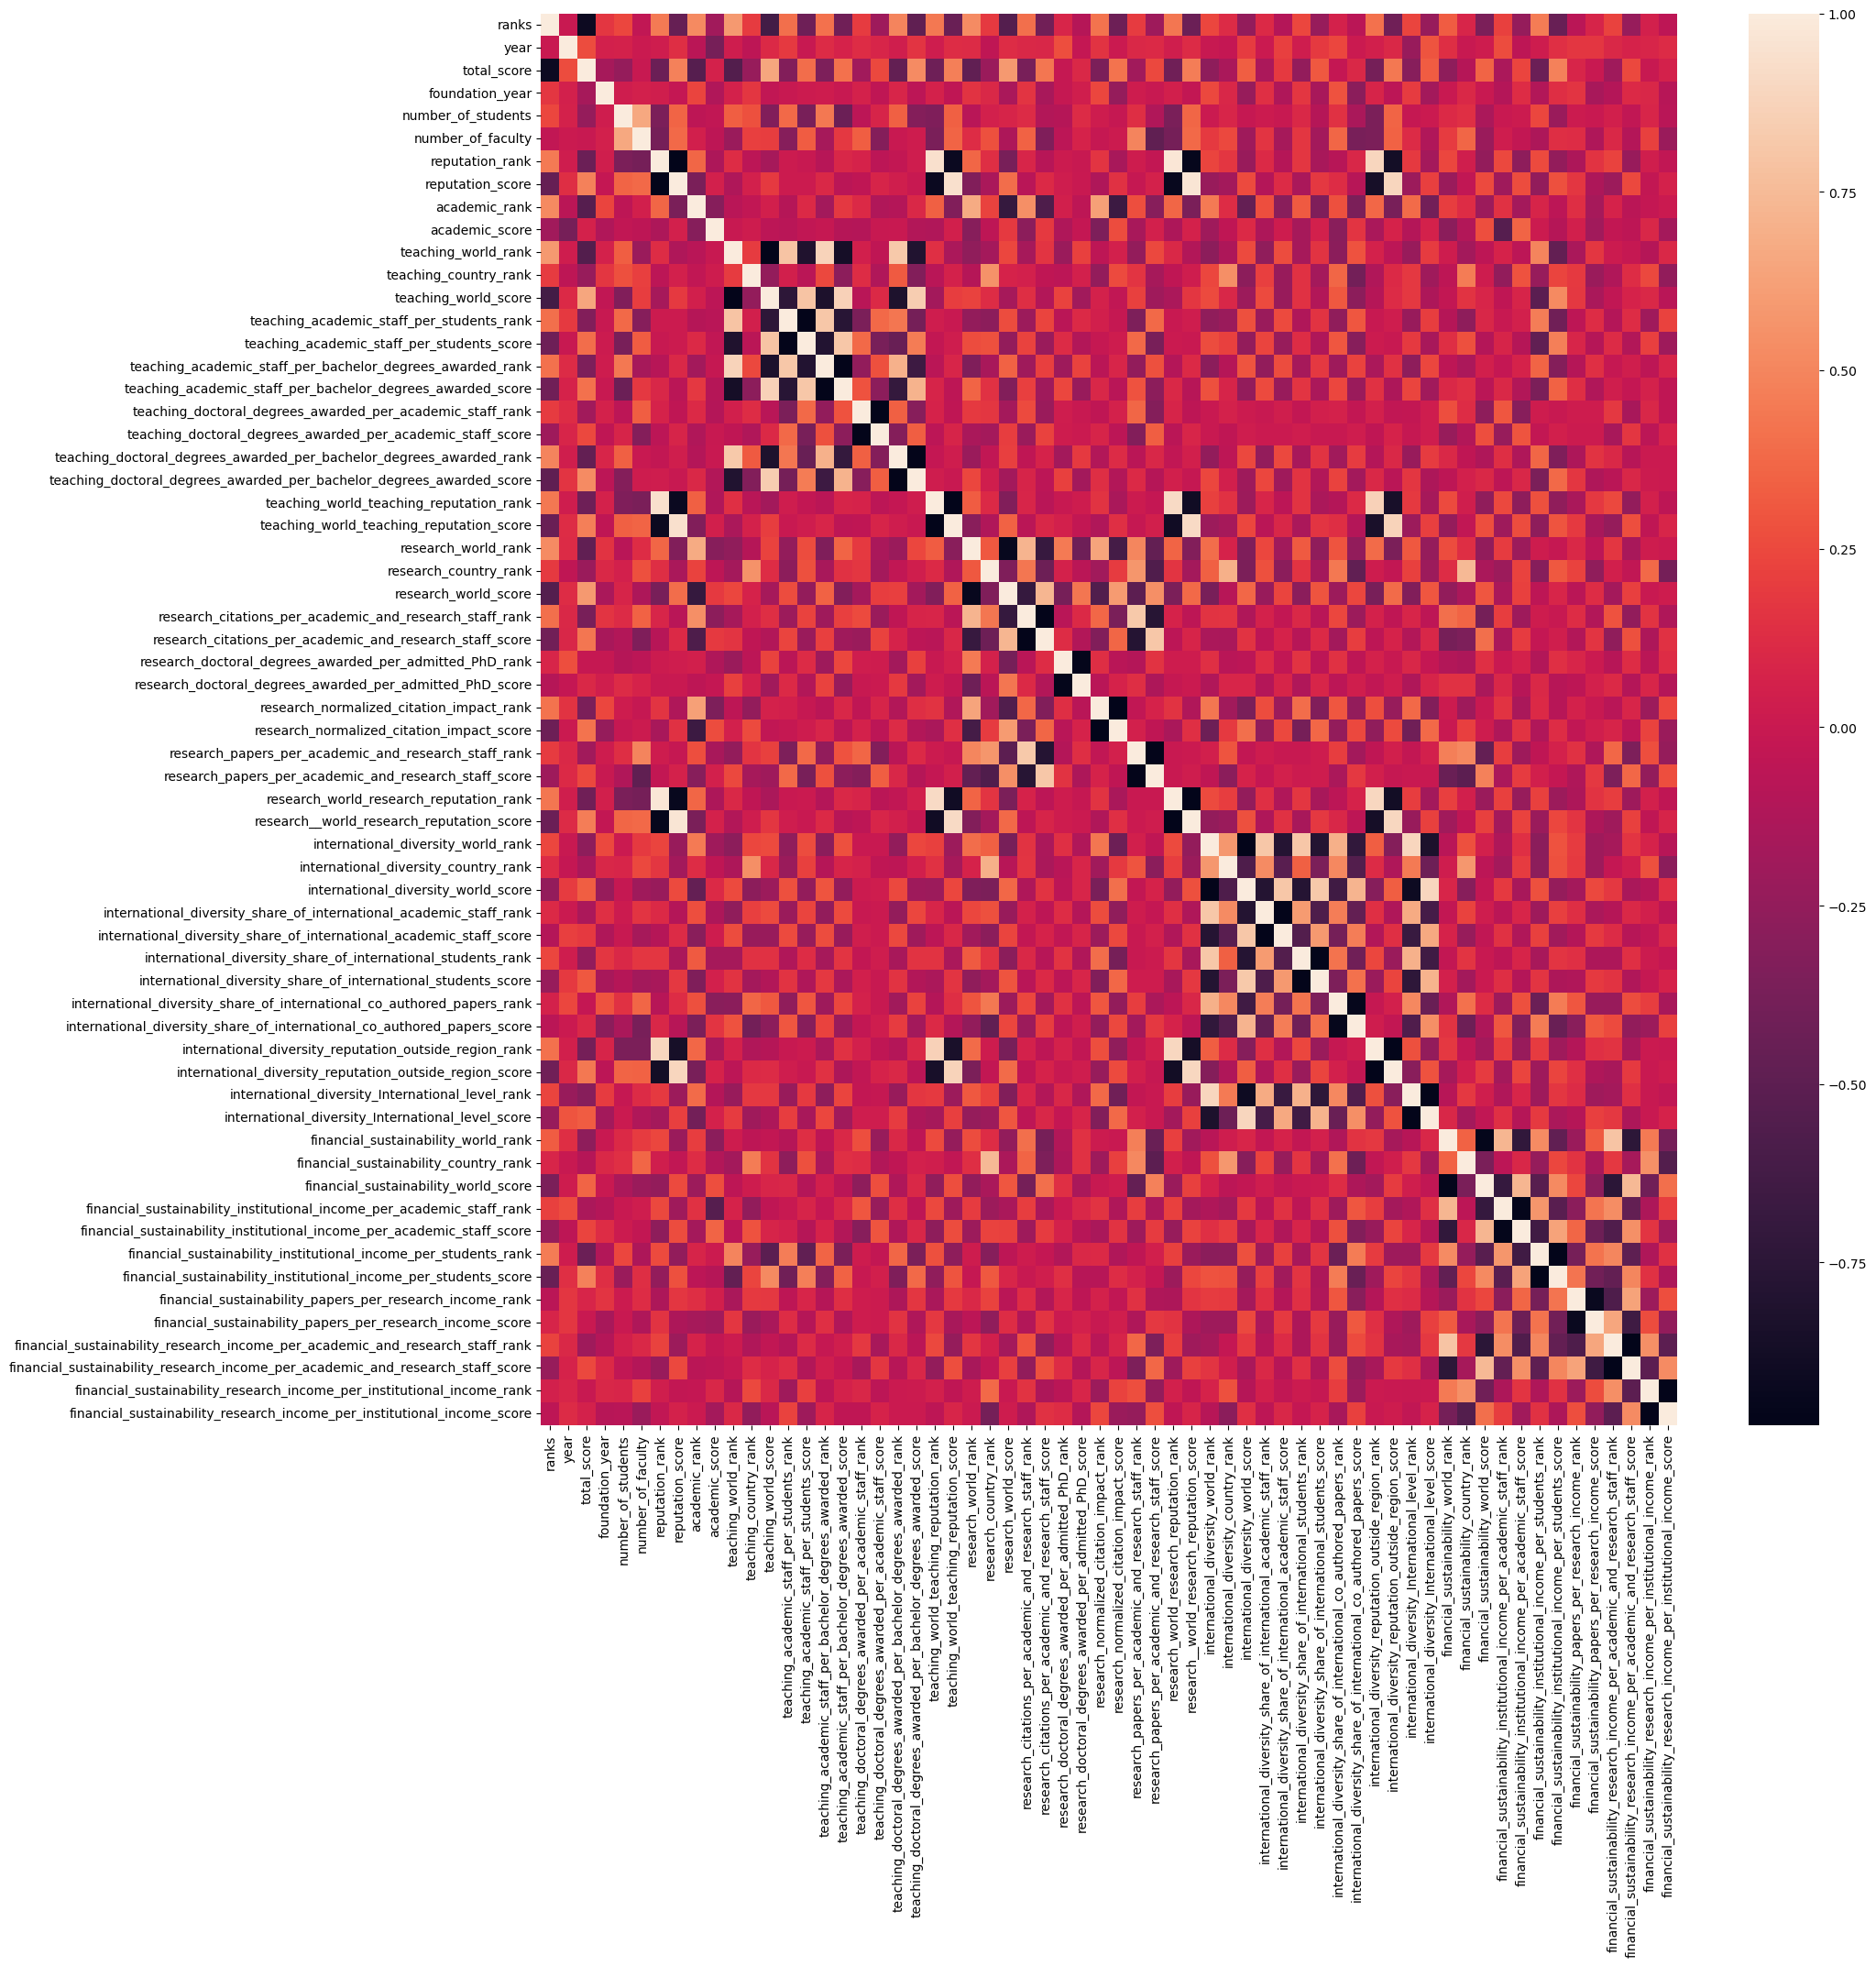

In [278]:
plt.figure(figsize=(20,20))
sns.heatmap(df_visual.corr())

In the scatter plot we can understand that the lower the rank value, meaning the better the rank - higher the score value, a negative linear connection. In this logic, we can understand that the connection between rank features and their corresponding score features are also negative linear connection.

<AxesSubplot:xlabel='total_score', ylabel='ranks'>

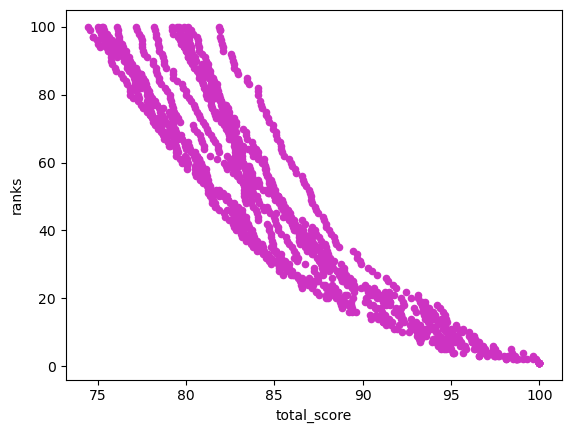

In [279]:
df_visual.plot.scatter(x='total_score',
                       y='ranks',
                        c="#CD33C2",
                       title="")

Now, let's look at our data through the years, 2010-2022. In this animation we can see the universities who got to the top 100 and their ranking in each year.Each year there are some similar and some different universities from the previous one, hence the changes of the graph. Some universities menage to get in the list each year, some got in the list in some years and some got there only once in 13 years. 

In [280]:
##special thanks to sites:
#https://plotly.com/python/animations/
#https://community.plotly.com/t/how-to-slow-down-animation-in-plotly-express/31309/5
#https://stackoverflow.com/questions/72034176/adjust-the-size-of-the-text-label-in-plotly
fig = px.bar(df_visual, x="university_name", y="ranks", color="country",width=1025, height=475,
  animation_frame="year", range_y=[0,100] ,title="Universities Ranked By Year")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_layout(
    font=dict(
        size=8, 

    )
)
fig.update_layout(margin=dict(l=100, r=10, t=100, b=100))
fig['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 225)
fig['layout']['sliders'][0]['pad']=dict(r=70, t=225,)
fig.show()

This graph shows how many top 100 qualified universities there are by region ever.
As we can see, Europe the most universities to reach top 100 with 73 universities, after that North America with 63 universities.

In [281]:
df_uni_region_ = df_visual[['region','university_name']]
df_uni_region_=df_uni_region_.drop_duplicates()

fig = px.histogram(df_uni_region_, x='region',  width=900, height=600,color_discrete_sequence=px.colors.qualitative.Bold,text_auto=True,
                title="Count of Unversities By Regions")
fig.update_xaxes(categoryorder="total descending")
fig.show()

This graph will show the amount of universities in each country.
Here, we can see that USA leads with 59 universities, after is UK with 20 universities.

In [282]:
df_uni_country_=df_visual[['country','university_name']]
df_uni_country_=df_uni_country_.drop_duplicates()

fig = px.histogram(df_uni_country_, x='country',  width=1000, height=700,color_discrete_sequence=px.colors.qualitative.Pastel1,text_auto=True,
                  title="Count of Universities By Countries")
fig.update_xaxes(tickangle=-45,categoryorder="total descending")
fig.show()

So we understand that most of the universities which are from North America are from one country, the US, where as there are universities from many different countries to represent Europe.

Another characteristic of our favorite universities is their type.
As the pie plot shows, there are many different types of universities, and some are very similar, for example, Public, general and Public, General,  and some are very uncommon so we decided its best to combine them in to three main types: Public, Private and Other.

In [283]:
def pie_chart(count,names):
    
    percents = count.to_numpy() * 100 / count.to_numpy().sum()
    
    plt.pie(count, shadow=True, startangle=90)
    plt.title('Universities Types')
    plt.axis('equal')
    plt.legend(loc='right',labels=['%s, %1.1f %%' % (l, s) for l, s in zip(count.index,percents)],bbox_to_anchor=(1.5,1))
    plt.show()

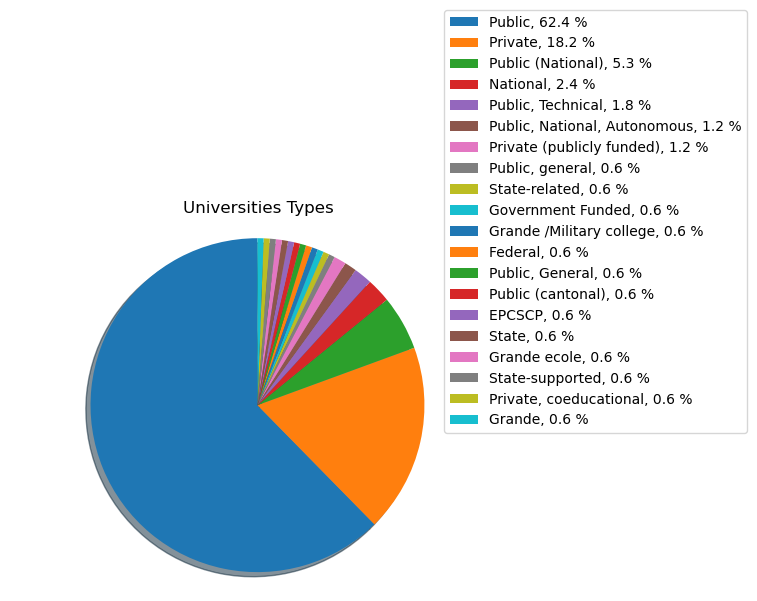

In [284]:
df_university_name_to_university_type=df_visual[["university_name","university_type"]]
df_university_name_to_university_type=df_university_name_to_university_type.drop_duplicates()
type_count=df_university_name_to_university_type["university_type"].value_counts()
type_names=type_count.index
pie_chart(type_count,type_names)

In [285]:

df_university_name_to_university_type["university_type"]=df_university_name_to_university_type["university_type"].replace(["Public (National)","Public, general","Public, Technical","Public, National, Autonomous","Public, General","Public (cantonal)"],"Public")
df_university_name_to_university_type["university_type"]=df_university_name_to_university_type["university_type"].replace(["Private (publicly funded)","Private, coeducational"],"Private")
df_university_name_to_university_type["university_type"]=df_university_name_to_university_type["university_type"].replace(["Federal","Grande /Military college","State-related","National","Government Funded","EPCSCP","State","Grande ecole","State-supported","Grande"],"Other")
df_university_name_to_university_type["university_type"].unique()


array(['Private', 'Public', 'Other'], dtype=object)

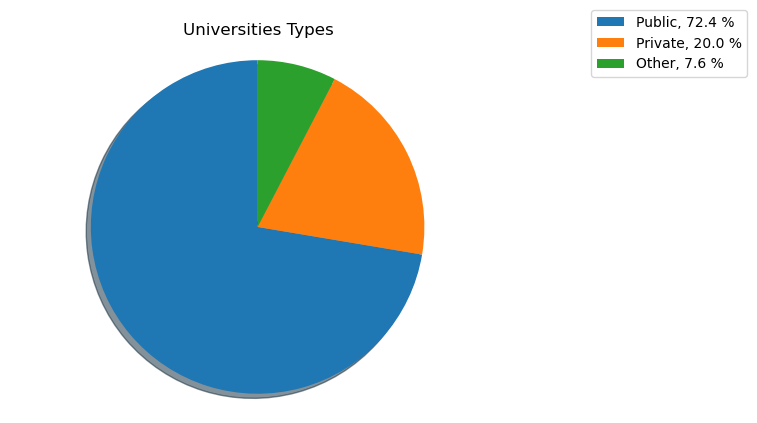

In [286]:
type_count2=df_university_name_to_university_type["university_type"].value_counts()
type_names2=type_count.index
pie_chart(type_count2,type_names2)
df_visual["university_type"]=df_university_name_to_university_type["university_type"]

To get a better picture of the ranking, we checked the ranking average of each university and displayed the 10 that has the best average with their best ranking and worst ranking ever. Harvard University has the best average of 1.3, California Institute of Technology is second with 1.9  and Stanford University is third with 3.5.

In [287]:
##special thanks to sites:
#https://plotly.com/python/bar-charts/
#https://stackoverflow.com/questions/66496583/plotly-how-to-add-data-labels-to-stacked-bar-charts-using-go-bar
import plotly.graph_objects as go
df_ranks_uni_= df_visual[["ranks","university_name"]]

df_ranks_uni_ = df_ranks_uni_.sort_values(by=['university_name'])
df_ranks_uni_ = df_ranks_uni_.reset_index(drop=True)
avg = []
MIN = []
MAX = []
name = df_ranks_uni_['university_name'][0]
count = 1
sum_ = df_ranks_uni_['ranks'][0]
min_ = df_ranks_uni_['ranks'][0]
max_ = df_ranks_uni_['ranks'][0]
for row in df_ranks_uni_.index:
    
    if df_ranks_uni_['university_name'][row] is not name:
        avg.append(sum_/count)
        MIN.append(min_)
        MAX.append(max_)
        name = df_ranks_uni_['university_name'][row]
        count = 1
        sum_= df_ranks_uni_['ranks'][row]
        min_ = df_ranks_uni_['ranks'][row]
        max_ = df_ranks_uni_['ranks'][row]
    else:
        sum_ = sum_+df_ranks_uni_['ranks'][row]
        if df_ranks_uni_['ranks'][row] > max_:
            max_ = df_ranks_uni_['ranks'][row]
        if df_ranks_uni_['ranks'][row] < min_:
            min_ = df_ranks_uni_['ranks'][row]
        count+=1
avg.append(sum_/count)
MIN.append(min_)
MAX.append(max_)
uni_name = df_ranks_uni_['university_name'].unique()   
df_avg_min_max_uni_ = pd.DataFrame({
    'average_ranks_overall': avg,
    'university_name': uni_name,
    'best_rank': MIN,
    'worst_rank': MAX
})
df_avg_min_max_uni_ = df_avg_min_max_uni_.sort_values(by=['average_ranks_overall'])
df_avg_min_max_uni_ = df_avg_min_max_uni_.reset_index(drop=True)
df_avg_min_max_uni_ = df_avg_min_max_uni_.iloc[0:10]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_avg_min_max_uni_["university_name"],
    y=df_avg_min_max_uni_["best_rank"],
    name='Best Rank',
    marker_color='#99FFA6',
    text = df_avg_min_max_uni_["best_rank"],
    width = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
))
fig.add_trace(go.Bar(
    x=df_avg_min_max_uni_["university_name"],
    y=df_avg_min_max_uni_["average_ranks_overall"],
    name='Average',
    marker_color='#42D155',
    text = df_avg_min_max_uni_["average_ranks_overall"],
    width = [0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]
))
fig.add_trace(go.Bar(
    x=df_avg_min_max_uni_["university_name"],
    y=df_avg_min_max_uni_["worst_rank"],
    name='Worst Rank',
    marker_color='darkgreen',
    text = df_avg_min_max_uni_["worst_rank"],
    width = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,width=1000, height=650, title="Top 10 Average Ranking Universities and Their Best and Worst Rank ")
fig.update_traces( texttemplate='%{text:.2}',textposition='inside')
fig.show()

Here we can see the amount of times universities reached top 5 ranking. We got 10 universities out of 170 universities in our dataframe. Harvard University, California Institute of Technology and Stanford University all reached top 5 in all 13 years.

In [288]:
df_top_5=df_visual[["university_name","ranks"]]
df_top_5=df_top_5[df_top_5["ranks"]<6]
top_5_ranks=[]
for i in range(len(df_top_5["university_name"].value_counts())):
    top_5_ranks.append(df_top_5["university_name"].value_counts()[i])

dict_top_5={"university_name":df_top_5["university_name"].value_counts().index.tolist(),"ranks":top_5_ranks}
df_top_5=pd.DataFrame(dict_top_5)
fig = px.histogram(df_top_5, x='university_name',y="ranks",color_discrete_sequence=px.colors.qualitative.Set2,text_auto=True,
                  title="Universities To Reach Top 5 Ranking")
fig.update_xaxes(tickangle=-45)
fig.update_layout(yaxis_title="rank count" )
fig.show()

The difference and similarities between the top 5 universities graph and the universities with the best average graph are that Harvard University, California Institute of Technology and Stanford University have the best averages and reached the top 5 each year, but some universities that are on our 10 universities with the best average never got to top 5, or some universities to reach top 5 didn’t make it in the top 10 best average graph. 

In [289]:

import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from collections import Counter

from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn import neighbors

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer

## machine learning
Finally, time to make some predictions.
In the machine learning level we used supervised learning.
The models we want to use as our machine learning are LeanearRegression and KNNRegressor.
we chose these models because the target column is a continuous variable and these models can be used for Regression problem.
Yet, we still had to do some data modifications before creating a machine learning model that can predict the Top 100 universities.

First,we use the function get_dummies() on the columns : university type, country and region.
Second,we use the function LabelEncoder() on university name column.

In [290]:
df_ml_1st_try=df_visual.copy()
df_ml_1st_try=pd.get_dummies(df_ml_1st_try,prefix=["university_type","country","region"],columns=["university_type","country","region"])
df_ml_1st_try["university_name"]=preprocessing.LabelEncoder().fit_transform(df_ml_1st_try["university_name"])

In [291]:
df_ml_1st_try.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 95 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   ranks                                                                           1298 non-null   int64  
 1   university_name                                                                 1298 non-null   int32  
 2   year                                                                            1298 non-null   int64  
 3   total_score                                                                     1298 non-null   float64
 4   foundation_year                                                                 1298 non-null   int64  
 5   number_of_students                                                              1298 non-null   int64  
 6   number_of_facult

Let's start with visualize the linear correlation between our target feature, "ranks", and the 4 main ranking features that, according to the website, are the main ranking measurement: teaching, research,international diversity and financial sustainability.

In [292]:
df_rank_corr=df_ml_1st_try[["ranks","teaching_world_rank","research_world_rank","international_diversity_world_rank","financial_sustainability_world_rank"]]
df_rank_corr.corr()


,ranks,teaching_world_rank,research_world_rank,international_diversity_world_rank,financial_sustainability_world_rank
ranks,1.000000,0.589935,0.526350,0.238994,0.322802
teaching_world_rank,0.589935,1.000000,-0.259439,-0.277629,0.022961
research_world_rank,0.526350,-0.259439,1.000000,0.390080,0.262246
international_diversity_world_rank,0.238994,-0.277629,0.390080,1.000000,-0.074393
financial_sustainability_world_rank,0.322802,0.022961,0.262246,-0.074393,1.000000


In [293]:
df_ml_1st_try.shape

(1298, 95)

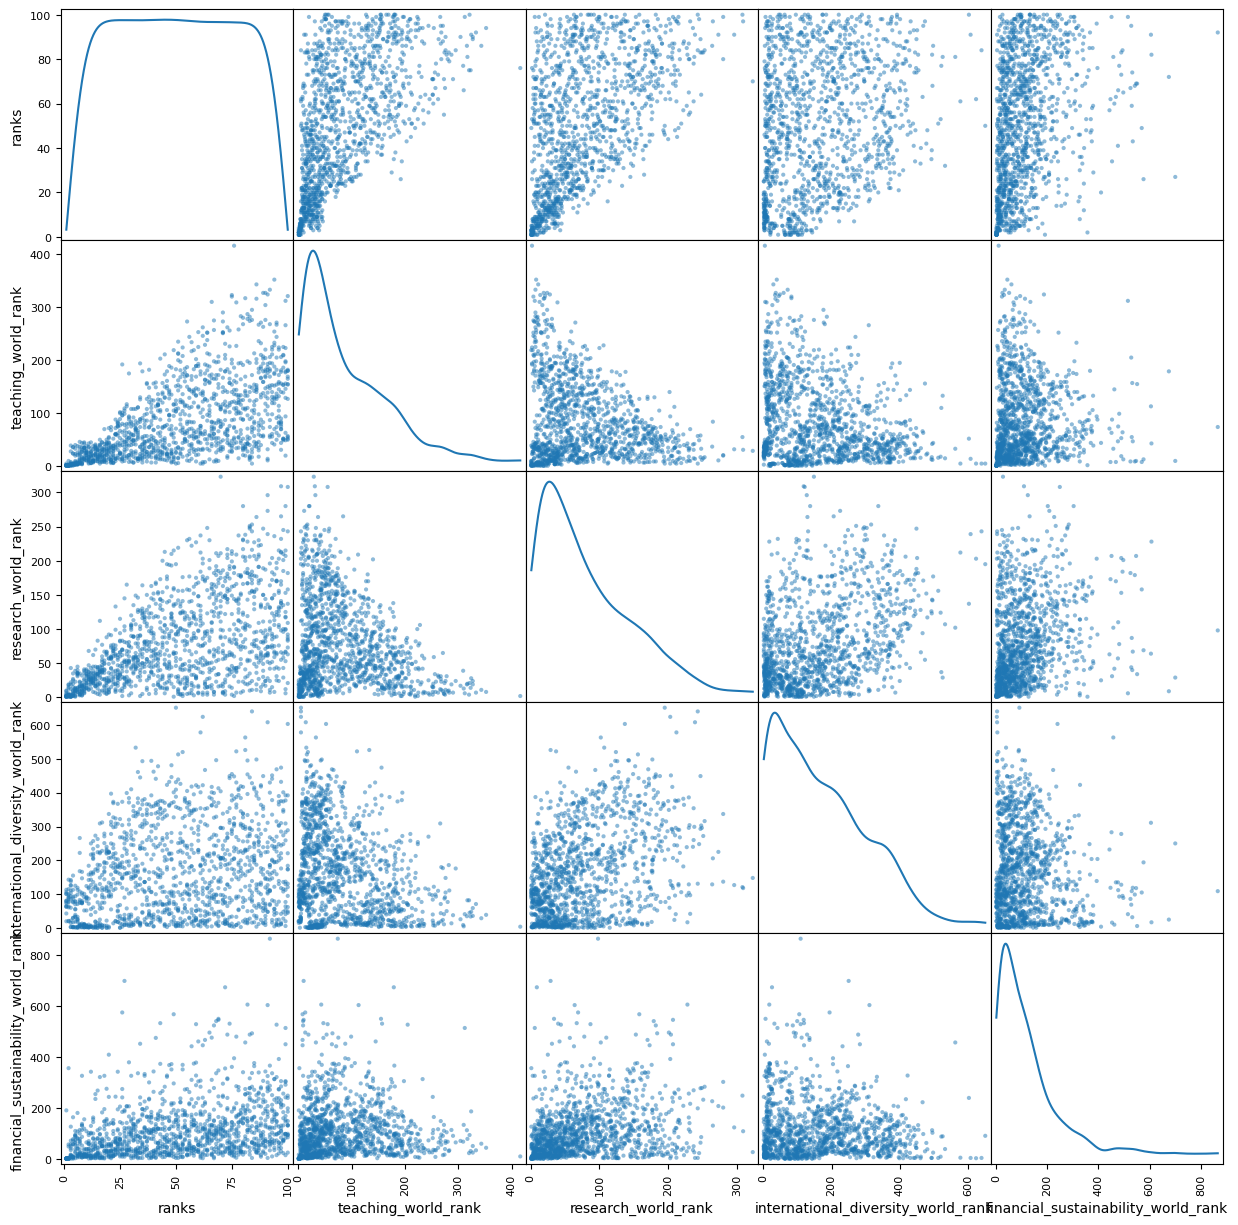

In [294]:
pd.plotting.scatter_matrix(df_rank_corr, figsize=(15, 15), diagonal='kde')
plt.show()

We will split the dataset into 2 separate tables: train and test. Also we will remove the target column that we want to predict for each dataset with a helper function split_X_y().

In [295]:
def split_x_y(data,target):
    df_split=data.copy()
    X=df_split.drop([target],axis=1)
    y=df_split[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test 
    

Now,we will run the LinearRegression and KNeighborsRegressor models and compare their results.

In [296]:
def linear_reg(data,target):
    X_train, X_test, y_train, y_test = split_x_y(data,target)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print("linear, rmse:",rmse)
    print("linear, train score: ",model.score(X_train,y_train))
    print("linear, test score: ",model.score(X_test,y_test))
    

In [297]:
#https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
def KNN(data,target):
    X_train, X_test, y_train, y_test=split_x_y(data,target)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    rmse_val = [] 
    score_train = []
    score_test = []
    for K in range(20):
        K = K+1
        model = neighbors.KNeighborsRegressor(n_neighbors = K)

        model.fit(X_train, y_train) 
        pred=model.predict(X_test) 
        error = np.sqrt(mean_squared_error(y_test,pred)) 
        rmse_val.append(error)
        score_train.append(model.score(X_train,y_train))
        score_test.append(model.score(X_test,y_test))
    print("knn, rmse: ",min(rmse_val))
    k_best_ind=rmse_val.index(min(rmse_val))
    print("knn, train score: ",score_train[k_best_ind])
    print("knn, test score: ",score_test[k_best_ind])
    
          

By the results of both models, we can see the Linear Regression model shows better results, but Knn Regression results are very good as well.

In [298]:
linear_reg(df_ml_1st_try,"ranks")
print("-----")
KNN(df_ml_1st_try,"ranks")


linear, rmse: 6.702164481330533
linear, train score:  0.9525301827766344
linear, test score:  0.9457208584189793
-----
knn, rmse:  11.641396625174119
knn, train score:  0.9599694249294498
knn, test score:  0.8362380583296212


By the results of both models, both rmse and r2. We can see the Linear Regression model shows better results, but Knn Regression results are very good as well.

## In Conclusion

In order to answer the research question, and to know if we can predict the Top 100 universities in the whole world, we did Data Cleaning, EDA, visualization, and data analysis.

Our conclusion is that we can predict the Top 100 universities with high results.


Properties of the Top 100 universities:

* Out of 170 universities, 59 are from the United States and 73 from Europe.
* Most of the universities are Public, 72%.
* Only 10 universities reached top 5 even once throughout the years (out of 170 diffrent universities)
* There are universities that stand out in their achievements like Harvard, California, and Stanford. Therefore, it can be concluded that they will be on the list in the following years as well.

We hope to see HIT on future ranking list, even tough HIT is not a university... yet... :)
